In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [9]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [10]:
single_image = x_train[0]

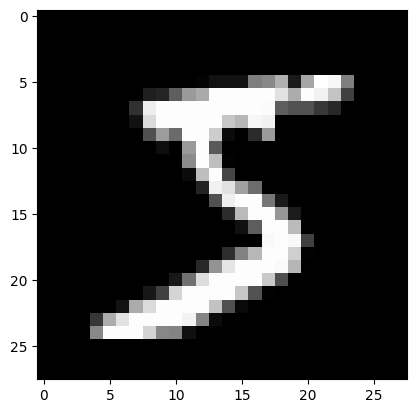

In [11]:
plt.imshow(single_image, cmap='gray') # cmap='gray' is used to show the image in black and white

In [12]:
# to_categorical is used to convert the labels into one hot encoding, i.e. 0 to 9
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x_train = x_train/255
x_test = x_test/255 # scaling the data between 0 and 1

scaled_image = x_train[0]

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1) # 1 is used to show that the image is in black and white
x_test = x_test.reshape(10000, 28, 28, 1)